## DDA3020 Autumn 2023 Homework 1 

### Programming Part 1：Polynomial Regression

--------------------------------------------------------------------------------------------------------------------------

In this exercise, we will try to fit a non-linear function $g$ with polynomial regression on the feasible space $\mathbf{X} = [0,11]$: 
$$\text{Unknown} \quad g(x) = ?$$ 
$$\text{Construct} \quad f(x) = \sum_{i=0}^n \alpha_i x^i \quad \Longleftrightarrow \quad f(x) = w^Tx',\quad x' = \begin{bmatrix} 1\\x\\x^2\\\vdots\\x^n\end{bmatrix},\quad s.t. \quad \forall x\in \mathbf{X}, \quad f(x) \approx g(x) $$ 
Where $n$ is the polynomial degree of freedom and is manually chosen.

--------------------------------------------------------------------------------------------------------------------------

In [164]:
import numpy as np
import matplotlib.pyplot as plt


We will use 17 noised samples to try to construct $f$.

In [165]:
x = np.array([ 0.    ,  0.6875,  1.375 ,  2.0625,  2.75  ,  3.4375,  4.125 , 4.8125,  5.5   ,  6.1875,  6.875 ,  7.5625,  8.25  ,  8.9375, 9.625 , 10.3125, 11.    ])
y = np.array([ -4.4282,   5.3943,   1.2416,  -5.9952,   3.1727,  18.6035, -3.2577,  -4.3593, -14.3989, -41.4483, -41.7916, -16.6214, 33.3262,  66.5037,  87.59  ,  64.3216,  10.4986])

#### 1. (1 point) 

(1) Define the function to calculate $\hat{w}$ directly from $X$, $y$ and $\lambda$:

$$\hat{w} = \arg\min_{w}\|Xw-y\|^2+\lambda\|w\|^2 \quad \Rightarrow\quad \hat{w} = (X^TX+\lambda I)^{-1}X^Ty$$

   - _Hint_: You are allowed to use _np.linalg.inv_ to calculate the inverse of a matrix.


In [166]:
def estimate_w(X,y,lambda_reg):
    return np.linalg.inv(X.T @ X + lambda_reg * np.eye(X.shape[1])) @ X.T @ y


#### 2. (3 points)
(1) Take $n = 3$ and $lambda = 0$. Solve the problem.

(2) Display your $\hat{y} = X\hat{w}$ as well as the given $y$. You are supposed to see:

<!-- ![pic1](hw1.png) -->
<img src = 'hw1.png' width = 40% height = 40% />


 - _Hint_: the mean squared error of this solution $\frac{(\hat{y}-y)^2}{17} = 754.55$

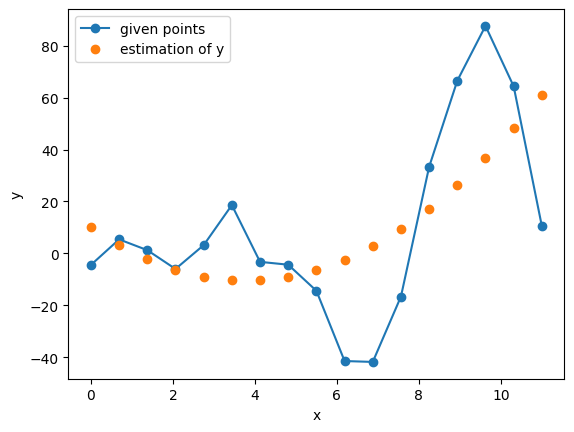

In [167]:
n = 3
lambda_reg = 0
X = np.vander(x,n+1,increasing=True)
w = estimate_w(X,y,lambda_reg)
y_el = X @ w
plt.plot(x,y,"o-",label="given points")
plt.plot(x,y_el,"o",label="estimation of y")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()





#### 3. (8 points) 

(1) Implement a grid search by changing the polynomial degree $n$ as well as the regularization parameter $\lambda$

(2) find the best mse (mean squared error) that you can reach. Print your best search mse.

In [168]:
maxn = [5,6,7,8,9,10,11]
lambdas = [0,0.01,0.1,1,10]
maxnn, lambdass = np.meshgrid(maxn, lambdas)
shape=(5,7)
mse_save = np.zeros(shape)
def cal_mean(X,y,w):
    y_act = X @ w
    mse = ((y_act-y)**2).mean()
    return mse

def grid_search(x,y,maxn,lambdas):
    bestn = 0
    bestlambdas = 0
    bestmse = float('inf')
    for n in maxn:
        for lambds_reg in lambdas:
            X = np.vander(x, n+1, increasing = True)
            w_act = estimate_w(X, y, lambds_reg)
            mse = cal_mean(X,y,w_act)
            mse_save[lambdas.index(lambds_reg),maxn.index(n)]=mse
            if mse<bestmse:
                bestmse = mse
                bestn = n
                bestlambdas = lambds_reg
    return bestmse, bestn, bestlambdas
bestmse, bestn, bestlambdas = grid_search(x,y,maxn,lambdas)
print("Best mse:", bestmse)
            






Best mse: 21.17863235052307


#### 4. (1 point) 

(1) Display in 3D the results of your grid search.

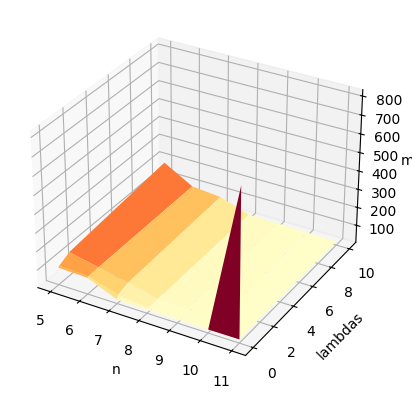

In [169]:
sho = plt.axes(projection='3d')
sho.plot_surface(maxnn,lambdass,mse_save,cmap="YlOrRd")
sho.set_xlabel('n')
sho.set_ylabel('lambdas')
sho.set_zlabel('mse')
plt.show()


#### 5. (1 point) 

(1) Define the function $f$ that you found.


In [170]:
def f(a):
    X1 = np.vander(a,bestn+1,increasing=True)
    X2 = np.vander(x,bestn+1, increasing=True)
    w = estimate_w(X2,y,bestlambdas)
    Y = X1 @ w
    return Y

#### 5. (6 points) 

(1) Load the 1000 points taken from the ground truth fuction $g$. You will find data on the range $x\in[-5,20]$.

(2) Display for $x\in [0,11]$:
 - Display $g$ in color 'C0' with the points that you loaded.
 - Scatter the given 17 samples in color 'C1'. 
 - Display (enough densely) your $f$ in color 'C2'.
 - Display the legend indicating the 3 plots. Specify the name for axis x and y.

(3) Repeat (2) for $x\in [-1,12]$

(4) Repeat (2) for $x\in [-2,13]$

(5) Give some comments on this work.

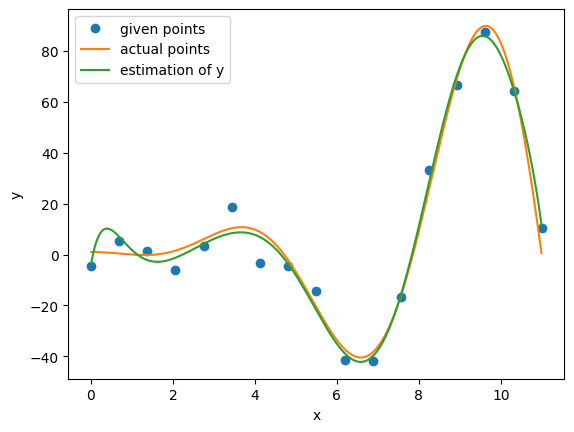

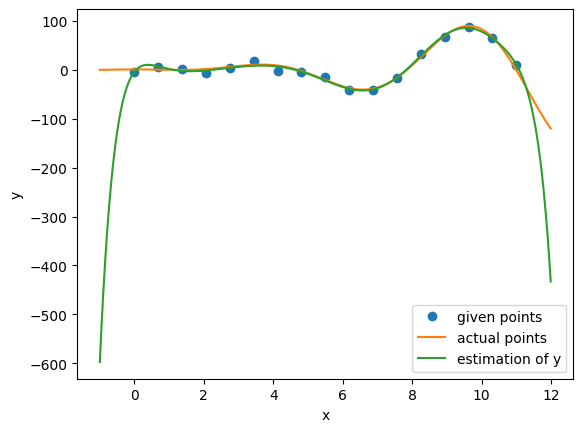

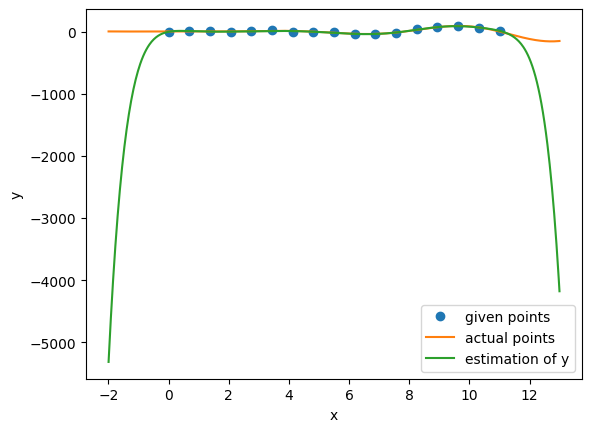

In [174]:
# load
import pickle as pkl
with open('ground truth function', 'rb') as f1:
    x_real_g, y_real_g = pkl.load(f1)
    f1.close()
l11,l12,l21,l22,l31,l32 = list(),list(),list(),list(),list(),list()
for i in range(len(x_real_g)):
    if 0<=x_real_g[i]<=11:
        l11.append(x_real_g[i])
        l12.append(y_real_g[i])
    if -1<=x_real_g[i]<=12:
        l21.append(x_real_g[i])
        l22.append(y_real_g[i])
    if -2<=x_real_g[i]<=13:
        l31.append(x_real_g[i])
        l32.append(y_real_g[i])
newl11 = np.array(l11)
newl12 = np.array(l12)
newl21 = np.array(l21)
newl22 = np.array(l22)
newl31 = np.array(l31)
newl32 = np.array(l32)
y1_els = f(newl11)
y2_els = f(newl21)
y3_els = f(newl31)
plt.plot(x,y,"o",label="given points")
plt.plot(newl11,newl12,"-",label="actual points")
plt.plot(newl11,y1_els,"-",label="estimation of y")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()
plt.plot(x,y,"o",label="given points")
plt.plot(newl21,newl22,"-",label="actual points")
plt.plot(newl21,y2_els,"-",label="estimation of y")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()
plt.plot(x,y,"o",label="given points")
plt.plot(newl31,newl32,"-",label="actual points")
plt.plot(newl31,y3_els,"-",label="estimation of y")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


comments: Beyond the range of 0 to 11, the fitting accuracy drops sharply, which means that this predictive model is only accurate within a certain interval, and the data predicted beyond the applicable range will not accurate.